<a href="https://colab.research.google.com/github/kabbo12012000/AiRoadMap/blob/main/Operation_on_Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import kagglehub
import os



path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

file_list = os.listdir(path)
print(f"Files in directory: {file_list}")


csv_file_path = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

dataset = pd.read_csv(csv_file_path)

dataset.head()

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn
Files in directory: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
missing_count = dataset.isnull().sum()
missing_percent = (missing_count / len(dataset)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent,
    'Data Type': dataset.dtypes
})

missing_summary = missing_summary[missing_summary['Missing Values'] > 0] \
                    .sort_values(by='Missing Values', ascending=False)

print(missing_summary)


Empty DataFrame
Columns: [Missing Values, Percentage (%), Data Type]
Index: []


In [ ]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
mean_value = dataset['TotalCharges'].mean()
dataset['TotalCharges'].fillna(mean_value, inplace=True)



/tmp/ipython-input-1047055294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['TotalCharges'].fillna(mean_value, inplace=True)


In [ ]:
dataset.replace(['?', 'NA', 'N/A', 'na', 'none', 'None', '-', ' ','Nan'], pd.NA, inplace=True)
dataset.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


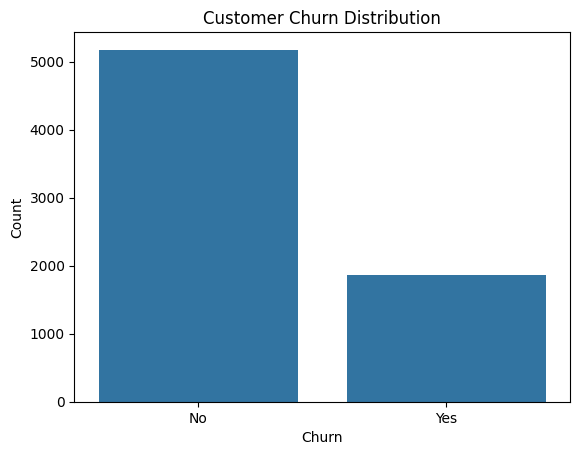

In [ ]:
churn_counts = dataset['Churn'].value_counts()
print(churn_counts)
print(f"\nChurn Rate: {(churn_counts['Yes'] / len(dataset)) * 100:.2f}%")

sns.countplot(x='Churn', data=dataset)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

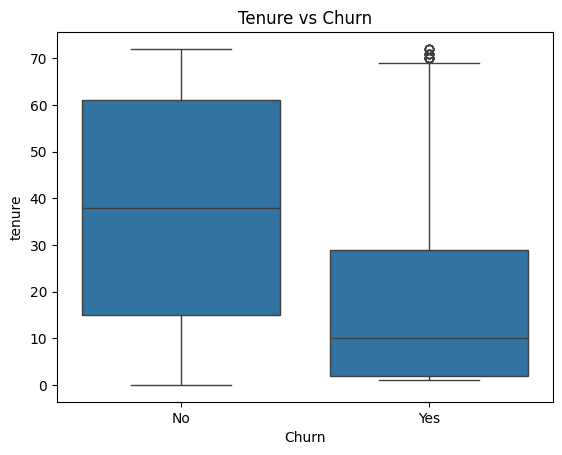

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=dataset)
plt.title('Tenure vs Churn')
plt.show()


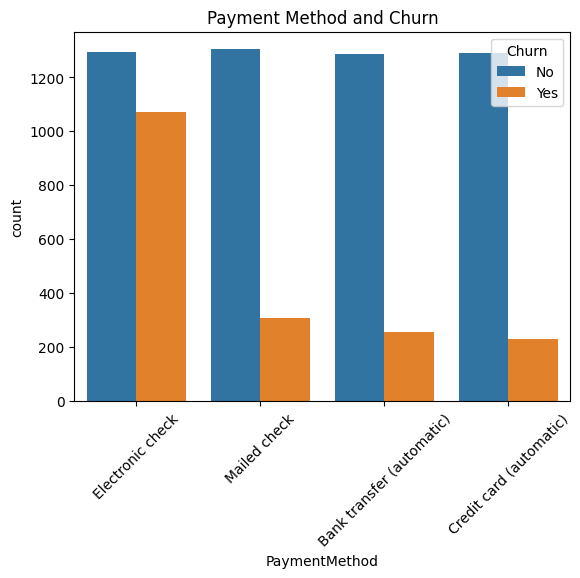

In [ ]:
sns.countplot(x='PaymentMethod', hue='Churn', data=dataset)
plt.title('Payment Method and Churn')
plt.xticks(rotation=45)
plt.show()


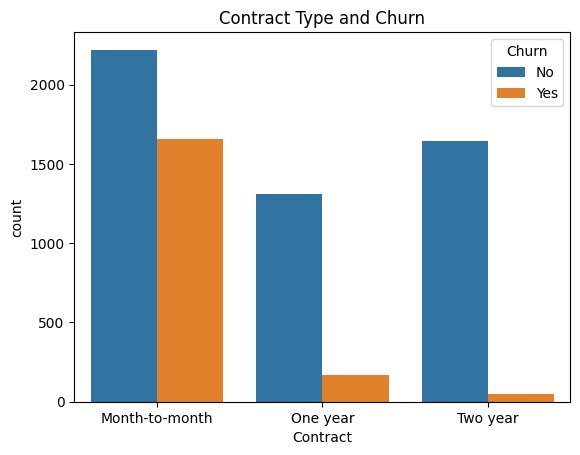

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=dataset)
plt.title('Contract Type and Churn')
plt.show()


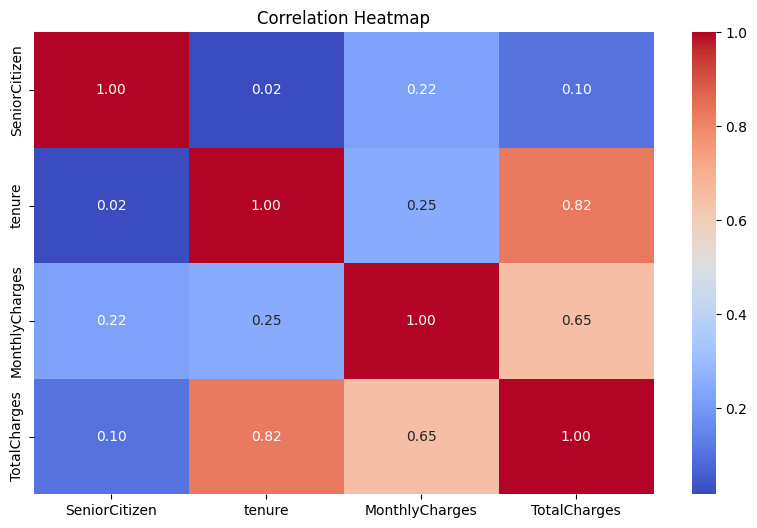

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
categorical_cols = dataset.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [ ]:
dataset.replace('No internet service', 'No', inplace=True)
dataset.replace('No phone service', 'No', inplace=True)
dataset.replace('Female', 'No', inplace=True)
dataset.replace('Male', 'Yes', inplace=True)



binary_cols = ['gender','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in binary_cols:
    dataset[col] = dataset[col].map({'Yes': 1, 'No': 0})
dataset.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
for col in ['InternetService', 'Contract', 'PaymentMethod']:
    print(f"--- {col} ---")
    print("dtype:", dataset[col].dtype)
    print("unique sample:", dataset[col].dropna().unique()[:20])
    print("value counts (top 10):")
    print(dataset[col].value_counts(dropna=False).head(10))
    print()


def normalize_series(s):
    return (s.astype(str)
             .str.strip()
             .str.replace(r'\s+', ' ', regex=True)
             .str.lower())

ds = dataset.copy()

ds['InternetService_norm'] = normalize_series(ds['InternetService'])
ds['Contract_norm'] = normalize_series(ds['Contract'])
ds['PaymentMethod_norm'] = normalize_series(ds['PaymentMethod'])

# Map definitions in lowercase (matching the normalization)
internet_map = {'no': 0, 'dsl': 1, 'fiber optic': 2, 'fiberoptic': 2, 'fiber': 2}
contract_map = {'month-to-month': 1, 'month to month': 1, 'one year': 2, 'two year': 3, 'two years': 3, 'one-year': 2, 'two-year': 3}
payment_map = {
    'electronic check': 1,
    'mailed check': 2,
    'bank transfer (automatic)': 3, 'bank transfer automatic': 3, 'bank transfer': 3,
    'credit card (automatic)': 4, 'credit card automatic': 4, 'credit card': 4
}

ds['InternetService_mapped'] = ds['InternetService_norm'].map(internet_map).fillna(-1).astype(int)
ds['Contract_mapped'] = ds['Contract_norm'].map(contract_map).fillna(-1).astype(int)
ds['PaymentMethod_mapped'] = ds['PaymentMethod_norm'].map(payment_map).fillna(-1).astype(int)


print("Unmapped counts (should be 0 ideally):")
print("InternetService unmapped:", (ds['InternetService_mapped'] == -1).sum())
print("Contract unmapped:", (ds['Contract_mapped'] == -1).sum())
print("PaymentMethod unmapped:", (ds['PaymentMethod_mapped'] == -1).sum())
print()

unmapped_mask = (ds['InternetService_mapped'] == -1) | (ds['Contract_mapped'] == -1) | (ds['PaymentMethod_mapped'] == -1)
if unmapped_mask.any():
    print("Examples of unmapped raw values (first 10 rows):")
    print(ds.loc[unmapped_mask, ['InternetService', 'InternetService_norm', 'InternetService_mapped',
                                 'Contract', 'Contract_norm', 'Contract_mapped',
                                 'PaymentMethod', 'PaymentMethod_norm', 'PaymentMethod_mapped']].head(10))
    print()

--- InternetService ---
dtype: object
unique sample: ['DSL' 'Fiber optic' 'No']
value counts (top 10):
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

--- Contract ---
dtype: object
unique sample: ['Month-to-month' 'One year' 'Two year']
value counts (top 10):
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

--- PaymentMethod ---
dtype: object
unique sample: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
value counts (top 10):
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Unmapped counts (should be 0 ideally):
InternetService unmapped: 0
Contract unmapped: 0
PaymentMethod unmapped: 0



In [ ]:
if (ds['InternetService_mapped'] == -1).sum() == 0 and (ds['Contract_mapped'] == -1).sum() == 0 and (ds['PaymentMethod_mapped'] == -1).sum() == 0:
    dataset['InternetService'] = ds['InternetService_mapped']
    dataset['Contract'] = ds['Contract_mapped']
    dataset['PaymentMethod'] = ds['PaymentMethod_mapped']
    print("Mapping applied to original dataset. Unique values now:")
    print("InternetService:", sorted(dataset['InternetService'].unique()))
    print("Contract:", sorted(dataset['Contract'].unique()))
    print("PaymentMethod:", sorted(dataset['PaymentMethod'].unique()))
else:
    print("There are unmapped values. Inspect the printed examples and extend the mapping rules as needed.")

Mapping applied to original dataset. Unique values now:
InternetService: [np.int64(0), np.int64(1), np.int64(2)]
Contract: [np.int64(1), np.int64(2), np.int64(3)]
PaymentMethod: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = dataset['Churn']
X = dataset.drop(columns=['Churn', 'customerID'], errors='ignore')

continuous_cols = [col for col in ['tenure', 'MonthlyCharges', 'TotalCharges'] if col in X.columns]

categorical_cols = [col for col in X.columns if col not in continuous_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler.fit(X_train[continuous_cols])

X_train_scaled[continuous_cols] = scaler.transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])


In [ ]:
print("Scaled features:", continuous_cols)
print("\nTrain set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


print("\nAfter scaling:")
print(X_train_scaled[continuous_cols].describe().loc[['mean', 'std']])

print("\nExample encoded columns (not scaled):")
print(X_train_scaled[categorical_cols].head())


Scaled features: ['tenure', 'MonthlyCharges', 'TotalCharges']

Train set shape: (5634, 19)
Test set shape: (1409, 19)

After scaling:
            tenure  MonthlyCharges  TotalCharges
mean -1.008935e-17   -2.402527e-16 -5.044677e-18
std   1.000089e+00    1.000089e+00  1.000089e+00

Example encoded columns (not scaled):
      gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
3738       1              0        0           0             0              0   
3151       1              0        1           1             1              0   
4860       1              0        1           1             0              0   
3867       0              0        1           0             1              0   
3810       1              0        1           1             1              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
3738                1               0             0                 1   
3151                2               1          

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay


log_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

log_model.fit(X_train_scaled, y_train)



LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [ ]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

Accuracy: 0.7423704755145494
ROC-AUC: 0.8406365444728616

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



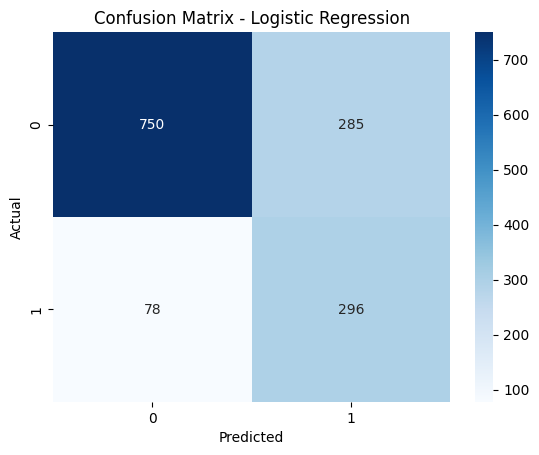

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

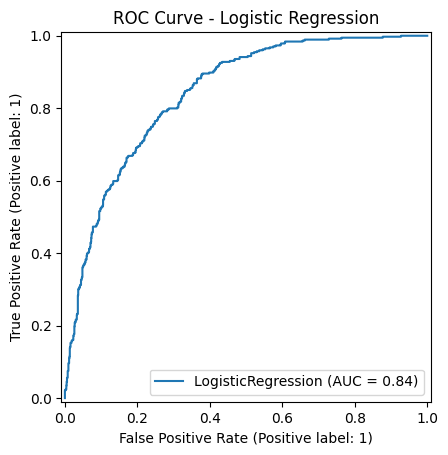

In [ ]:
RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.title('ROC Curve - Logistic Regression')
plt.show()


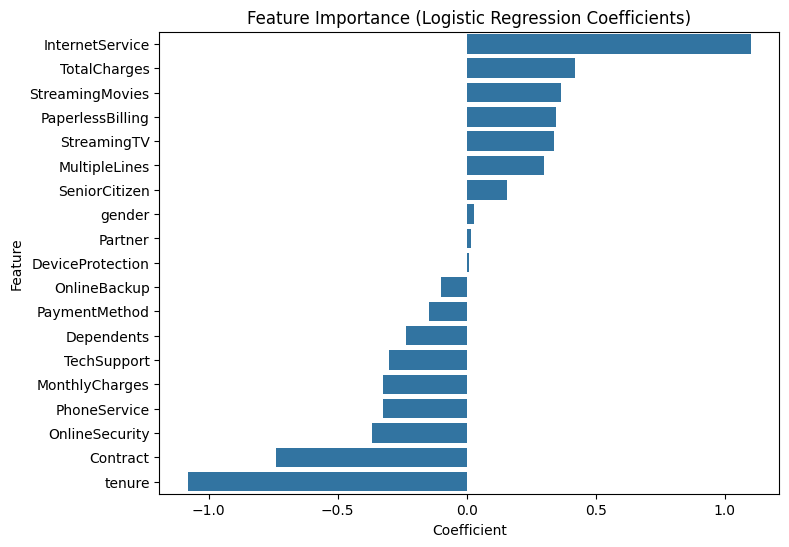

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()


K=3: Accuracy=0.7530, ROC-AUC=0.7407
              precision    recall  f1-score   support

           0     0.8319    0.8319    0.8319      1035
           1     0.5348    0.5348    0.5348       374

    accuracy                         0.7530      1409
   macro avg     0.6833    0.6833    0.6833      1409
weighted avg     0.7530    0.7530    0.7530      1409



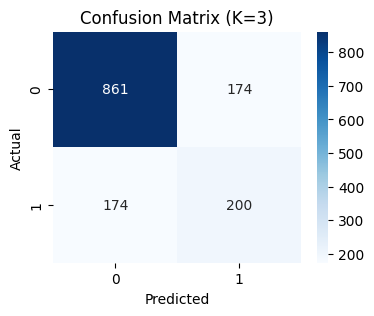

K=5: Accuracy=0.7665, ROC-AUC=0.7871
              precision    recall  f1-score   support

           0     0.8388    0.8444    0.8416      1035
           1     0.5613    0.5508    0.5560       374

    accuracy                         0.7665      1409
   macro avg     0.7000    0.6976    0.6988      1409
weighted avg     0.7651    0.7665    0.7658      1409



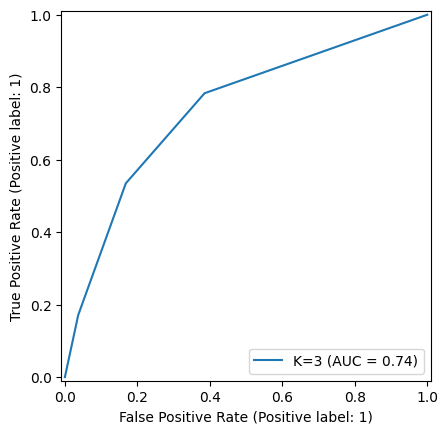

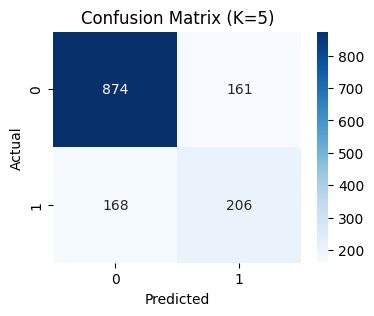

K=7: Accuracy=0.7665, ROC-AUC=0.7959
              precision    recall  f1-score   support

           0     0.8336    0.8522    0.8428      1035
           1     0.5641    0.5294    0.5462       374

    accuracy                         0.7665      1409
   macro avg     0.6989    0.6908    0.6945      1409
weighted avg     0.7621    0.7665    0.7641      1409



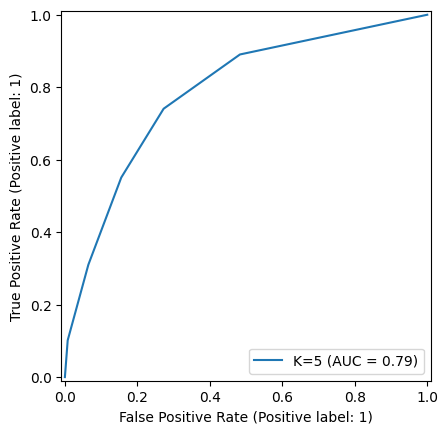

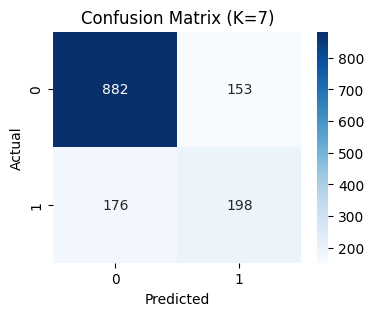

K=9: Accuracy=0.7665, ROC-AUC=0.8051
              precision    recall  f1-score   support

           0     0.8362    0.8483    0.8422      1035
           1     0.5627    0.5401    0.5512       374

    accuracy                         0.7665      1409
   macro avg     0.6994    0.6942    0.6967      1409
weighted avg     0.7636    0.7665    0.7650      1409



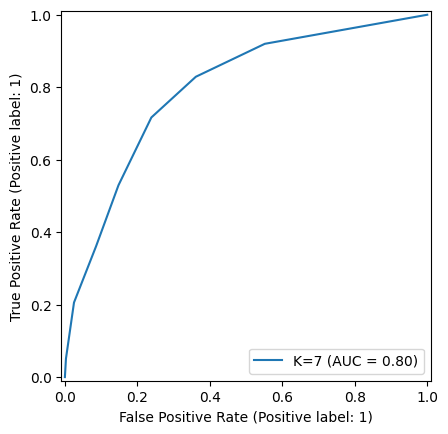

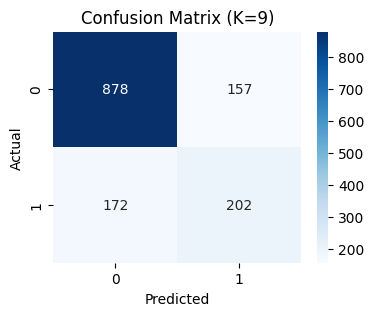

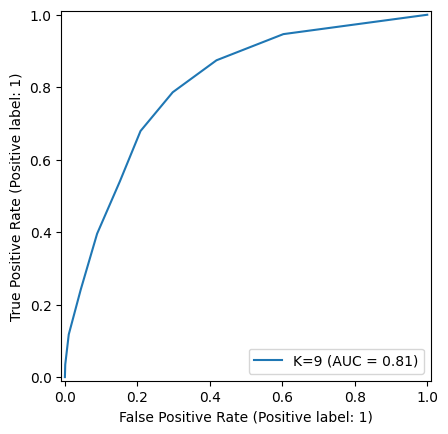

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_list = [3, 5, 7, 9]

results = []

# plt.figure(figsize=(8, 6))
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    y_proba = knn.predict_proba(X_test_scaled)[:, 1]

    # 4. evaluate
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    print(f"K={k}: Accuracy={acc:.4f}, ROC-AUC={roc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (K={k})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    results.append({
        'k': k,
        'accuracy': acc,
        'roc_auc': roc,
        'precision_churn': report['1']['precision'],
        'recall_churn': report['1']['recall'],
        'f1_churn': report['1']['f1-score']
    })
    # ROC curve on common figure
    RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test, name=f'K={k}')

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
print("\nSummary (sorted by ROC-AUC):")
print(results_df)

best = results_df.iloc[0]
print(f"\nBest k by ROC-AUC: k = {best['k']} (ROC-AUC = {best['roc_auc']:.4f}, Accuracy = {best['accuracy']:.4f})")

# Store the best KNN model
best_k_value = int(best['k'])
best_knn = KNeighborsClassifier(n_neighbors=best_k_value)
best_knn.fit(X_train_scaled, y_train)


Summary (sorted by ROC-AUC):
   k  accuracy   roc_auc  precision_churn  recall_churn  f1_churn
0  9  0.766501  0.805109         0.562674      0.540107  0.551160
1  7  0.766501  0.795852         0.564103      0.529412  0.546207
2  5  0.766501  0.787060         0.561308      0.550802  0.556005
3  3  0.753016  0.740749         0.534759      0.534759  0.534759

Best k by ROC-AUC: k = 9.0 (ROC-AUC = 0.8051, Accuracy = 0.7665)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)
y_test_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test  Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Train Accuracy: 0.9978700745473909
Test  Accuracy: 0.7388218594748048
ROC-AUC: 0.6580717662559096

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1035
           1       0.51      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation F1 Score:", grid.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Best Cross-Validation F1 Score: 0.6204258562219814


In [ ]:
best_dt = grid.best_estimator_
best_dt.fit(X_train_scaled, y_train)

y_pred = best_dt.predict(X_test_scaled)
y_proba = best_dt.predict_proba(X_test_scaled)[:, 1]


Accuracy: 0.7459190915542938
ROC-AUC: 0.8162029502182955

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409



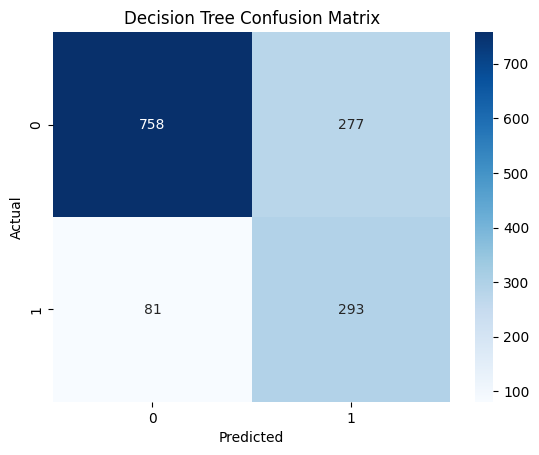

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:

feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': best_dt.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10))


            Feature  Importance
14         Contract    0.729686
7   InternetService    0.124223
4            tenure    0.103823
17   MonthlyCharges    0.042268
2           Partner    0.000000
0            gender    0.000000
1     SeniorCitizen    0.000000
6     MultipleLines    0.000000
8    OnlineSecurity    0.000000
5      PhoneService    0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_baseline = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_baseline.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

Accuracy: 0.7885024840312278
ROC-AUC: 0.8241584644397943

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



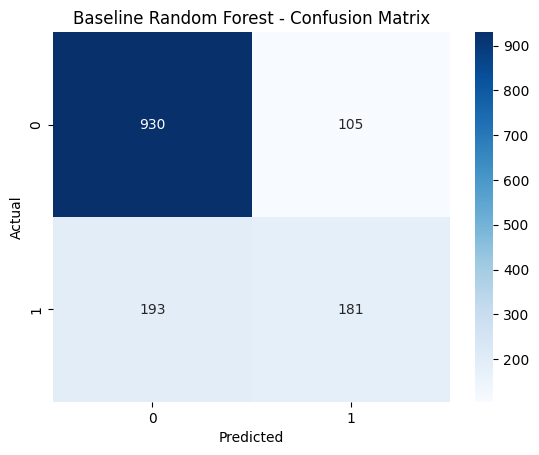

In [ ]:
y_pred = rf_baseline.predict(X_test_scaled)
y_proba = rf_baseline.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
rf_feat_imp = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_baseline.feature_importances_
}).sort_values('importance', ascending=False)

print(rf_feat_imp.head(15))

             feature  importance
18      TotalCharges    0.172200
17    MonthlyCharges    0.169495
4             tenure    0.160965
14          Contract    0.119512
7    InternetService    0.065337
16     PaymentMethod    0.063773
15  PaperlessBilling    0.025448
0             gender    0.025341
8     OnlineSecurity    0.023776
11       TechSupport    0.021052
2            Partner    0.021020
9       OnlineBackup    0.020227
3         Dependents    0.019702
1      SeniorCitizen    0.017467
6      MultipleLines    0.017308


In [ ]:
dt_feat_imp = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance_dt': best_dt.feature_importances_
}).sort_values('importance_dt', ascending=False)

compare_imp = dt_feat_imp.merge(rf_feat_imp.rename(columns={'importance':'importance_rf'}), on='feature') \
                         .sort_values('importance_rf', ascending=False)

print(compare_imp.head(15))


             feature  importance_dt  importance_rf
18      TotalCharges       0.000000       0.172200
3     MonthlyCharges       0.042268       0.169495
2             tenure       0.103823       0.160965
0           Contract       0.729686       0.119512
1    InternetService       0.124223       0.065337
17     PaymentMethod       0.000000       0.063773
16  PaperlessBilling       0.000000       0.025448
5             gender       0.000000       0.025341
8     OnlineSecurity       0.000000       0.023776
14       TechSupport       0.000000       0.021052
4            Partner       0.000000       0.021020
12      OnlineBackup       0.000000       0.020227
10        Dependents       0.000000       0.019702
6      SeniorCitizen       0.000000       0.017467
7      MultipleLines       0.000000       0.017308


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [5, 10, 15, None],
    'max_features': ['sqrt', 'log2', 0.3, 0.6]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

grid_rf = GridSearchCV(rf, param_grid, cv=4, scoring='f1', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_scaled, y_train)

print("Best params:", grid_rf.best_params_)
print("Best CV f1:", grid_rf.best_score_)


Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best params: {'max_depth': 5, 'max_features': 0.3, 'n_estimators': 200}
Best CV f1: 0.6325762093777793


Test Accuracy: 0.7544357700496807
Test ROC-AUC: 0.8438412255547805

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.80      0.64       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409



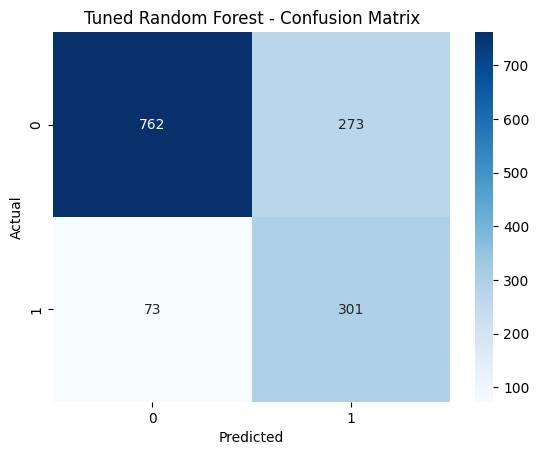

In [ ]:
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train_scaled, y_train)

y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)[:,1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
best_rf_imp = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance_rf_tuned': best_rf.feature_importances_
}).sort_values('importance_rf_tuned', ascending=False)

compare2 = dt_feat_imp.merge(best_rf_imp, on='feature').sort_values('importance_rf_tuned', ascending=False)
print(compare2.head(15))



             feature  importance_dt  importance_rf_tuned
0           Contract       0.729686             0.330448
2             tenure       0.103823             0.186020
1    InternetService       0.124223             0.151909
3     MonthlyCharges       0.042268             0.083000
18      TotalCharges       0.000000             0.076560
17     PaymentMethod       0.000000             0.072127
16  PaperlessBilling       0.000000             0.023499
8     OnlineSecurity       0.000000             0.017801
14       TechSupport       0.000000             0.012291
15   StreamingMovies       0.000000             0.008453
13       StreamingTV       0.000000             0.006809
12      OnlineBackup       0.000000             0.006261
10        Dependents       0.000000             0.005273
9       PhoneService       0.000000             0.004472
7      MultipleLines       0.000000             0.004390


In [ ]:
models = {
    'LogisticRegression': log_model,
    'KNN_k5': best_knn,
    'DecisionTree': best_dt,
    'RandomForest': best_rf
}


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rows = []
for name, model in models.items():

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:

        if hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test_scaled)
        else:
            y_proba = model.predict(X_test_scaled)

    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    try:
        roc = roc_auc_score(y_test, y_proba)
    except:
        roc = np.nan

    print(f"\n=== {name} ===")
    print("Confusion matrix:\n", cm)
    print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    print(f"Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}, ROC-AUC={roc:.4f}")

    rows.append({
        'model': name,
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
        'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc
    })

summary_df = pd.DataFrame(rows).set_index('model')
print("\nSummary table:")
print(summary_df)


=== LogisticRegression ===
Confusion matrix:
 [[750 285]
 [ 78 296]]
TN=750, FP=285, FN=78, TP=296
Accuracy=0.7424, Precision=0.5095, Recall=0.7914, F1=0.6199, ROC-AUC=0.8406

=== KNN_k5 ===
Confusion matrix:
 [[878 157]
 [172 202]]
TN=878, FP=157, FN=172, TP=202
Accuracy=0.7665, Precision=0.5627, Recall=0.5401, F1=0.5512, ROC-AUC=0.8051

=== DecisionTree ===
Confusion matrix:
 [[758 277]
 [ 81 293]]
TN=758, FP=277, FN=81, TP=293
Accuracy=0.7459, Precision=0.5140, Recall=0.7834, F1=0.6208, ROC-AUC=0.8162

=== RandomForest ===
Confusion matrix:
 [[762 273]
 [ 73 301]]
TN=762, FP=273, FN=73, TP=301
Accuracy=0.7544, Precision=0.5244, Recall=0.8048, F1=0.6350, ROC-AUC=0.8438

Summary table:
                     TN   FP   FN   TP  accuracy  precision    recall  \
model                                                                   
LogisticRegression  750  285   78  296  0.742370   0.509466  0.791444   
KNN_k5              878  157  172  202  0.766501   0.562674  0.540107   
DecisionTre

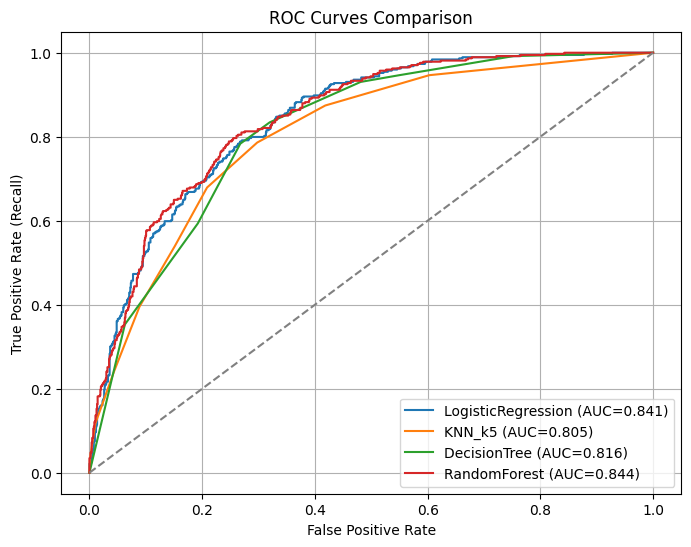

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_scaled)
    else:
        # skip plotting if no probability-like output
        print(f"Skipping ROC for {name} (no prob/decision_function).")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:

print(summary_df.sort_values(by='recall', ascending=False).round(4))


print(summary_df.sort_values(by='roc_auc', ascending=False).round(4))


                     TN   FP   FN   TP  accuracy  precision  recall      f1  \
model                                                                         
RandomForest        762  273   73  301    0.7544     0.5244  0.8048  0.6350   
LogisticRegression  750  285   78  296    0.7424     0.5095  0.7914  0.6199   
DecisionTree        758  277   81  293    0.7459     0.5140  0.7834  0.6208   
KNN_k5              878  157  172  202    0.7665     0.5627  0.5401  0.5512   

                    roc_auc  
model                        
RandomForest         0.8438  
LogisticRegression   0.8406  
DecisionTree         0.8162  
KNN_k5               0.8051  
                     TN   FP   FN   TP  accuracy  precision  recall      f1  \
model                                                                         
RandomForest        762  273   73  301    0.7544     0.5244  0.8048  0.6350   
LogisticRegression  750  285   78  296    0.7424     0.5095  0.7914  0.6199   
DecisionTree        758  277 

Random Forest achieved the highest overall performance, showing the best balance between recall, F1-score, and ROC-AUC. Its ensemble approach effectively reduced overfitting and improved generalization compared to the single Decision Tree model.

Logistic Regression provided competitive performance with excellent interpretability, making it a reliable baseline model.

Decision Tree was interpretable but prone to overfitting without regularization (max_depth, min_samples_leaf).

KNN performed inconsistently due to sensitivity to scaling and class imbalance.

Overall, Random Forest was selected as the most suitable model for predicting customer churn due to its high predictive power and stability.

valuation Metrics Interpretation

Precision: Measures the proportion of correctly identified churners among all predicted churners. High precision minimizes unnecessary retention efforts.

Recall: Measures the ability to correctly identify actual churners. High recall ensures we catch most at-risk customers.

For this business context, recall is more important

eature analysis revealed several strong predictors of churn:

Contract Type: Customers with month-to-month contracts are far more likely to churn compared to those with longer-term contracts.

Tenure: Customers with shorter tenure show higher churn probability, indicating early-stage dissatisfaction.

Payment Method: Users paying via electronic check display higher churn rates, possibly linked to payment friction or lack of auto-renewal.

Monthly Charges and Total Charges: Higher monthly charges correlate with increased churn, especially when perceived value is low.

Internet Service Type: Fiber optic users showed relatively higher churn compared to DSL, suggesting possible service quality or pricing issues.

Recommended Model for Deployment

Model: Random Forest Classifier

Reason: Highest recall and F1-score, robust to overfitting, effective handling of class imbalance with class_weight='balanced'.

Deployment Strategy: Integrate model into the CRM system to flag high-risk customers and trigger retention campaigns before contract renewal dates.

Business Implications of False Positives and False Negatives
Type	Meaning	Business Impact
False Positive (FP)	Predicts churn for a loyal customer	Unnecessary retention offer, slight operational cost
False Negative (FN)	Fails to detect an actual churner	Revenue loss and potential brand damage

Given the high cost of false negatives, the business should prioritize reducing FN — thus, a recall-optimized model is most beneficial.

Limitations and Potential Improvements

Class Imbalance: Although handled using balanced weights, applying SMOTE (Synthetic Minority Over-sampling Technique) may further improve minority class prediction.

Temporal Generalization: The model assumes static customer behavior. Future work should include time-based validation to simulate real-world prediction scenarios.

Feature Engineering: Adding interaction terms (e.g., MonthlyCharges × Tenure) or derived features (average monthly spend) could improve discrimination power.

Model Interpretability: Implementing SHAP or LIME can improve transparency of predictions for decision-makers.

Deployment Feedback Loop: Continuous retraining with new data will help maintain model relevance as customer patterns evolve.